In [2]:
!pip install plotly

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Breast Cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df = df.drop(['Unnamed: 32'], axis = 1)

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA

In [11]:
pca = PCA()
pca.fit_transform(X_scaled)

array([[ 9.18319983e+00,  1.97127137e+00, -1.17162471e+00, ...,
        -3.39113949e-02,  4.55717832e-02, -4.71657487e-02],
       [ 2.38329766e+00, -3.75345877e+00, -5.80228664e-01, ...,
         3.26298575e-02, -5.90208043e-03, -1.84483129e-03],
       [ 5.74247239e+00, -1.08035048e+00, -5.33087882e-01, ...,
         4.70218699e-02,  3.28969989e-03,  7.35346039e-04],
       ...,
       [ 1.25189010e+00, -1.89397674e+00,  5.34466848e-01, ...,
        -2.56758630e-03,  6.34033194e-03,  3.80807814e-03],
       [ 1.03650353e+01,  1.69639755e+00, -1.90741785e+00, ...,
        -6.80834660e-02, -8.43022898e-02, -2.37630430e-02],
       [-5.47826365e+00, -6.72788035e-01,  1.47716504e+00, ...,
        -9.51329032e-03, -6.10512178e-02, -1.94561856e-02]])

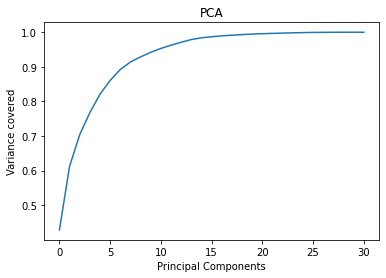

In [12]:
#Scree Plot
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance covered')
plt.title('PCA')
plt.show()

Around 13 Principal components are able to explain > 95% variance. Its safe to consider starting 13 PC's

In [13]:
pca = PCA(n_components = 13)
new_pcomp = pca.fit_transform(X_scaled)
princi_comp = pd.DataFrame(new_pcomp, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
                                                'PC10', 'PC11', 'PC12', 'PC13'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,9.183200,1.971271,-1.171625,3.639332,-1.193098,-1.372280,0.371844,2.180529,-0.231611,-0.090397,-0.875269,0.264550,-0.859587
1,2.383298,-3.753459,-0.580229,1.127438,0.624850,-0.126616,-0.288270,0.044935,0.426917,-0.659937,1.085345,0.810107,0.158532
2,5.742472,-1.080350,-0.533088,0.903470,-0.180601,-0.401855,0.463188,-0.715209,-0.010711,-0.082304,0.426615,-0.603991,0.122945
3,7.124384,10.272225,-3.150161,0.121512,-2.968055,-2.561668,1.950177,1.287990,1.272640,-1.171374,-1.219462,-1.138541,1.003877
4,3.945694,-1.959689,1.401177,2.937555,0.540853,1.233300,-0.205435,-0.959329,0.629118,-0.166356,0.379517,0.649890,-0.109982
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.435329,-3.565358,2.399112,1.197814,-0.071089,2.028789,-1.345195,-0.522454,-0.184012,1.045676,0.365118,-0.072627,0.129724
565,3.789458,-3.573419,2.029505,-2.478688,-0.498521,-0.080422,-1.024112,-0.585571,-0.949736,-0.258745,-0.134605,0.246298,0.222092
566,1.251890,-1.893977,0.534467,-2.077633,1.814829,0.394713,-0.437806,-0.178668,0.262116,0.475979,0.580846,-0.847766,0.101483
567,10.365035,1.696398,-1.907418,-2.351807,-0.028220,-0.656720,-0.195264,0.275202,-0.072777,-0.518181,-0.117398,-0.178069,-0.696723


In [14]:
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

In [16]:
x_train, x_test, y_train, y_test = train_test_split(princi_comp, y, test_size = 0.3, random_state = 355)

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [17]:
print(classification_report(y_test, y_pred, digits = 2))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98       112
           M       0.98      0.95      0.97        59

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [18]:
param_grid = {
    'C': [0.001, 2, 3, 4, 5, 6, 7, 10],
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1]
    
}

In [19]:
gridsearch = GridSearchCV(svc, param_grid)

In [20]:
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 2, 3, 4, 5, 6, 7, 10],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1]})

In [21]:
gridsearch.best_params_

{'C': 4, 'gamma': 0.1}

In [22]:
svc = SVC(C = 4, gamma = 0.1)

In [23]:
svc.fit(x_train, y_train)

SVC(C=4, gamma=0.1)

In [24]:
y_pred = svc.predict(x_test)

In [25]:
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[106,   6],
       [  3,  56]], dtype=int64)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.95      0.96       112
           M       0.90      0.95      0.93        59

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



# Create Pipeline

In [28]:
df = pd.read_csv('Breast Cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
X = df.drop(['Unnamed: 32', 'diagnosis'], axis = 1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 355)

In [30]:
pipe = Pipeline([('Scaler', StandardScaler()),   #fit_transorm
                ('PCA', PCA(n_components = 13)), #fit_transform 
                ('SVM', SVC(C = 4, gamma = 0.1))])   #Only fit

# ('Simple Imputer', SimpleImputer(strategy = 'mean'))
# ('Ohe', OneHotEncoder(handle_unknown = 'ignore'))

In [31]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=13)),
                ('SVM', SVC(C=4, gamma=0.1))])

In [32]:
y_pred = pipe.predict(x_test)

In [33]:
accuracy_score(y_test, y_pred)

0.972027972027972